In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Dataset_path=r"C:/users/HP/Downloads/exam"
IMG_SIZE=(224,224)
BATCH_SIZE=32
SEED=42

In [3]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    Dataset_path,
    validation_split=0.3,
    subset="training",
    seed=SEED,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

full_val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    Dataset_path,
    validation_split=0.3,
    subset="validation",
    seed=SEED,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

train_size=len(train_ds)
val_size=len(full_val_ds)//2
test_size=len(full_val_ds)-val_size

valid_ds=full_val_ds.take(val_size)
test_ds=full_val_ds.skip(val_size)

Found 1000 files belonging to 2 classes.
Using 700 files for training.
Found 1000 files belonging to 2 classes.
Using 300 files for validation.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [6]:
model=Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)             │ (None, 222, 222, 32)  │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_5               │ (None, 111, 111, 32)  │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_6 (Conv2D)             │ (None, 109, 109, 64)  │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_6               │ (None, 54, 54, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_7 (Conv2D)             │ (None, 52, 52, 128)   │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_7               │ (None, 26, 26, 128)   │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_8 (Conv2D)             │ (None, 24, 24, 64)    │       73,792 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_8               │ (None, 12, 12, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_9 (Conv2D)             │ (None, 10, 10, 32)    │       18,464 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_9               │ (None, 5, 5, 32)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_1 (Flatten)           │ (None, 800)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_2 (Dense)               │ (None, 128)           │      102,528 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_3 (Dense)               │ (None, 1)             │          129 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 288,161 (1.10 MB)

 Trainable params: 288,161 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history=model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=7)


Epoch 1/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6902 - loss: 0.5623 - val_accuracy: 0.5562 - val_loss: 0.7077
Epoch 2/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7420 - loss: 0.5438 - val_accuracy: 0.6187 - val_loss: 0.7394
Epoch 3/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7619 - loss: 0.4651 - val_accuracy: 0.5500 - val_loss: 0.7593
Epoch 4/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7677 - loss: 0.4595 - val_accuracy: 0.5875 - val_loss: 0.8192
Epoch 5/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8289 - loss: 0.3769 - val_accuracy: 0.6375 - val_loss: 0.6960
Epoch 6/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8198 - loss: 0.3532 - val_accuracy: 0.6062 - val_loss: 0.9418
Epoch 7/7
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8853 - loss: 0.2674 - val_accuracy: 0.5688 - val_loss: 1.0988


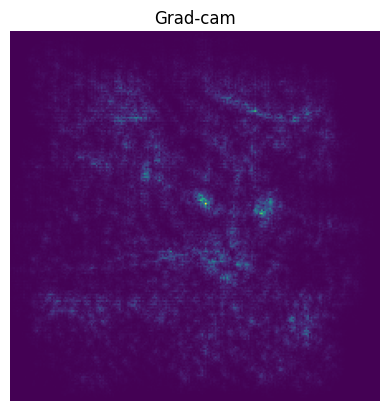

In [23]:
from tf_keras_vis.utils.model_modifiers import GuidedBackpropagation
from tf_keras_vis.saliency import Saliency

for images, labels in train_ds.take(1):
    single_image=images[0].numpy()
    label=labels[0]
    break

def binary_score(output):
    return output[:,0]

saliency=Saliency(model, model_modifier=GuidedBackpropagation())
gbp=saliency(binary_score, single_image)

normalised_image=single_image-np.min(single_image)
normalised_image /=(single_image.max()+1e-8)

plt.imshow(normalised_image)
plt.imshow(np.abs(gbp[0].squeeze()), cmap='viridis')
plt.title("Grad-cam")
plt.axis("off")
plt.show()